<h2 style="color: #2c3e50;">📊 Metadata about the Data we Have:</h2> 

<ul>
  <li><b style="color: #2980b9;">Row ID:</b> <span style="color: #34495e;">Unique identifier for each row (might not be important analytically).</span></li>
  <li><b style="color: #2980b9;">Order ID:</b> <span style="color: #34495e;">Identifier for each order (may appear multiple times if one order has multiple items).</span></li>
  <li><b style="color: #2980b9;">Order Date:</b> <span style="color: #34495e;">The date when the order was placed.</span></li>
  <li><b style="color: #2980b9;">Ship Date:</b> <span style="color: #34495e;">The date when the order was shipped.</span></li>
  <li><b style="color: #2980b9;">Ship Mode:</b> <span style="color: #34495e;">Shipping method used (e.g., Second Class, Standard Class).</span></li>
  <li><b style="color: #2980b9;">Customer ID:</b> <span style="color: #34495e;">Unique ID for each customer.</span></li>
  <li><b style="color: #2980b9;">Customer Name:</b> <span style="color: #34495e;">Name of the customer.</span></li>
  <li><b style="color: #2980b9;">Segment:</b> <span style="color: #34495e;">Customer segment (e.g., Consumer, Corporate, Home Office).</span></li>
  <li><b style="color: #2980b9;">Country:</b> <span style="color: #34495e;">Country of the customer (looks like all are "United States").</span></li>
  <li><b style="color: #2980b9;">City:</b> <span style="color: #34495e;">City of the customer.</span></li>
  <li><b style="color: #2980b9;">State:</b> <span style="color: #34495e;">State of the customer.</span></li>
  <li><b style="color: #2980b9;">Postal Code:</b> <span style="color: #34495e;">ZIP code (some are float, consider converting to string/integer).</span></li>
  <li><b style="color: #2980b9;">Region:</b> <span style="color: #34495e;">Geographical region (e.g., South, West).</span></li>
  <li><b style="color: #2980b9;">Product ID:</b> <span style="color: #34495e;">Unique ID for each product.</span></li>
  <li><b style="color: #2980b9;">Category:</b> <span style="color: #34495e;">Product category (Furniture, Office Supplies, etc).</span></li>
  <li><b style="color: #2980b9;">Sub-Category:</b> <span style="color: #34495e;">Product sub-category (e.g., Bookcases, Chairs, Labels).</span></li>
  <li><b style="color: #2980b9;">Product Name:</b> <span style="color: #34495e;">Full name of the product.</span></li>
  <li><b style="color: #2980b9;">Sales:</b> <span style="color: #34495e;">Sales value (in dollars).</span></li>
</ul>


# *1: Data Collection, Exploration, and Preprocessing* 

In [1]:
# Importing the necessary libraries for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\bhbt\Desktop\Sales-Forcasting-Project\1. data\raw\train.csv")
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
5,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,7,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,8,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
8,9,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040
9,10,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000


In [3]:
df.shape

(9800, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True) #convert Order dates to pandas datetime forma
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)  #convert shipping dates to pandas datetime format

In [6]:
df['Shipping Time (days)'] = (df['Ship Date'] - df['Order Date']).dt.days

In [7]:
df['Order Month'] = df['Order Date'].dt.month
df['Order Day Of Week'] = df['Order Date'].dt.dayofweek
df['Order Year'] = df['Order Date'].dt.year

In [8]:
df.isnull().sum()

Row ID                   0
Order ID                 0
Order Date               0
Ship Date                0
Ship Mode                0
Customer ID              0
Customer Name            0
Segment                  0
Country                  0
City                     0
State                    0
Postal Code             11
Region                   0
Product ID               0
Category                 0
Sub-Category             0
Product Name             0
Sales                    0
Shipping Time (days)     0
Order Month              0
Order Day Of Week        0
Order Year               0
dtype: int64

### Handle The Null 

In [9]:
df[df['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping Time (days),Order Month,Order Day Of Week,Order Year
2234,2235,CA-2018-104066,2018-12-05,2018-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,...,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,5,12,2,2018
5274,5275,CA-2016-162887,2016-11-07,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,...,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,2,11,0,2016
8798,8799,US-2017-150140,2017-04-06,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,...,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,4,4,3,2017
9146,9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,4,1,0,2017
9147,9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,4,1,0,2017
9148,9149,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,4,1,0,2017
9386,9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,4,1,4,2018
9387,9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,4,1,4,2018
9388,9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94,4,1,4,2018
9389,9390,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04,4,1,4,2018


 #### *By filtering nulls we see that all the rows with NaN in the Postal Code are for the city of Burlington in the state of Vermont.*

In [10]:
df['Postal Code'] = df['Postal Code'].fillna('05401')
df['Postal Code'] = df['Postal Code'].astype(str)

In [11]:
df.isnull().sum()

Row ID                  0
Order ID                0
Order Date              0
Ship Date               0
Ship Mode               0
Customer ID             0
Customer Name           0
Segment                 0
Country                 0
City                    0
State                   0
Postal Code             0
Region                  0
Product ID              0
Category                0
Sub-Category            0
Product Name            0
Sales                   0
Shipping Time (days)    0
Order Month             0
Order Day Of Week       0
Order Year              0
dtype: int64

In [12]:
df.describe() 

,Row ID,Order Date,Ship Date,Sales,Shipping Time (days),Order Month,Order Day Of Week,Order Year
count,9800.000000,9800,9800,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000
mean,4900.500000,2017-05-01 05:13:51.673469440,2017-05-05 04:17:52.653061120,230.769059,3.961122,7.818469,2.993673,2016.724184
min,1.000000,2015-01-03 00:00:00,2015-01-07 00:00:00,0.444000,0.000000,1.000000,0.000000,2015.000000
25%,2450.750000,2016-05-24 00:00:00,2016-05-27 18:00:00,17.248000,3.000000,5.000000,1.000000,2016.000000
50%,4900.500000,2017-06-26 00:00:00,2017-06-29 00:00:00,54.490000,4.000000,9.000000,3.000000,2017.000000
75%,7350.250000,2018-05-15 00:00:00,2018-05-19 00:00:00,210.605000,5.000000,11.000000,5.000000,2018.000000
max,9800.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,22638.480000,7.000000,12.000000,6.000000,2018.000000
std,2829.160653,NaN,NaN,626.651875,1.749614,3.281905,2.180441,1.123984


In [13]:
df[df['Sales'] > 10000]  #  check if outliers in sales 

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping Time (days),Order Month,Order Day Of Week,Order Year
2623,2624,CA-2018-127180,2018-10-22,2018-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,...,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,2,10,0,2018
2697,2698,CA-2015-145317,2015-03-18,2015-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,5,3,2,2015
4190,4191,CA-2018-166709,2018-11-17,2018-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,...,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,5,11,5,2018
6826,6827,CA-2017-118689,2017-10-02,2017-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,7,10,0,2017
8153,8154,CA-2018-140151,2018-03-23,2018-03-25,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,...,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,2,3,4,2018


#### *Data Review - Sales and Shipping Information*

 Let's break down the logic behind some key elements:

##### *1. Sales vs. Shipping Time (days)*
   - **High Sales with Fast Shipping:**
     - For expensive products like the "Canon imageCLASS 2200 Advanced Copier," fast shipping makes sense since high-ticket items might be shipped faster due to demand or premium service options.
   - **High Sales with Long Shipping:**
     - High-ticket items with a long shipping time can be less logical in some cases, but might occur due to logistics issues or limited availability of stock.

##### *2. Customer Segment vs. Shipping Mode*
   - **Home Office vs. Corporate:**
     - Customers in different segments (e.g., Home Office and Corporate) may prefer different shipping methods. Corporate customers might opt for slower but more flexible shipping, while Home Office customers may prefer faster methods.

##### *3. Order Date vs. Ship Date*
   - **Reasonable Shipping Time:**
     - Normally, the difference between the order date and ship date should be reasonable (e.g., an order placed on October 22 and shipped on October 24). However, some orders have long delays, which could be due to store policies, supplier issues, or unforeseen delays in logistics.

# *2: Data Analysis and Visualization*

In [14]:
#sorting data by order date
df.sort_values(by=['Order Date'], inplace=True, ascending=True)
#setting the index to be the date will help us a lot later on
df.set_index("Order Date", inplace = True)

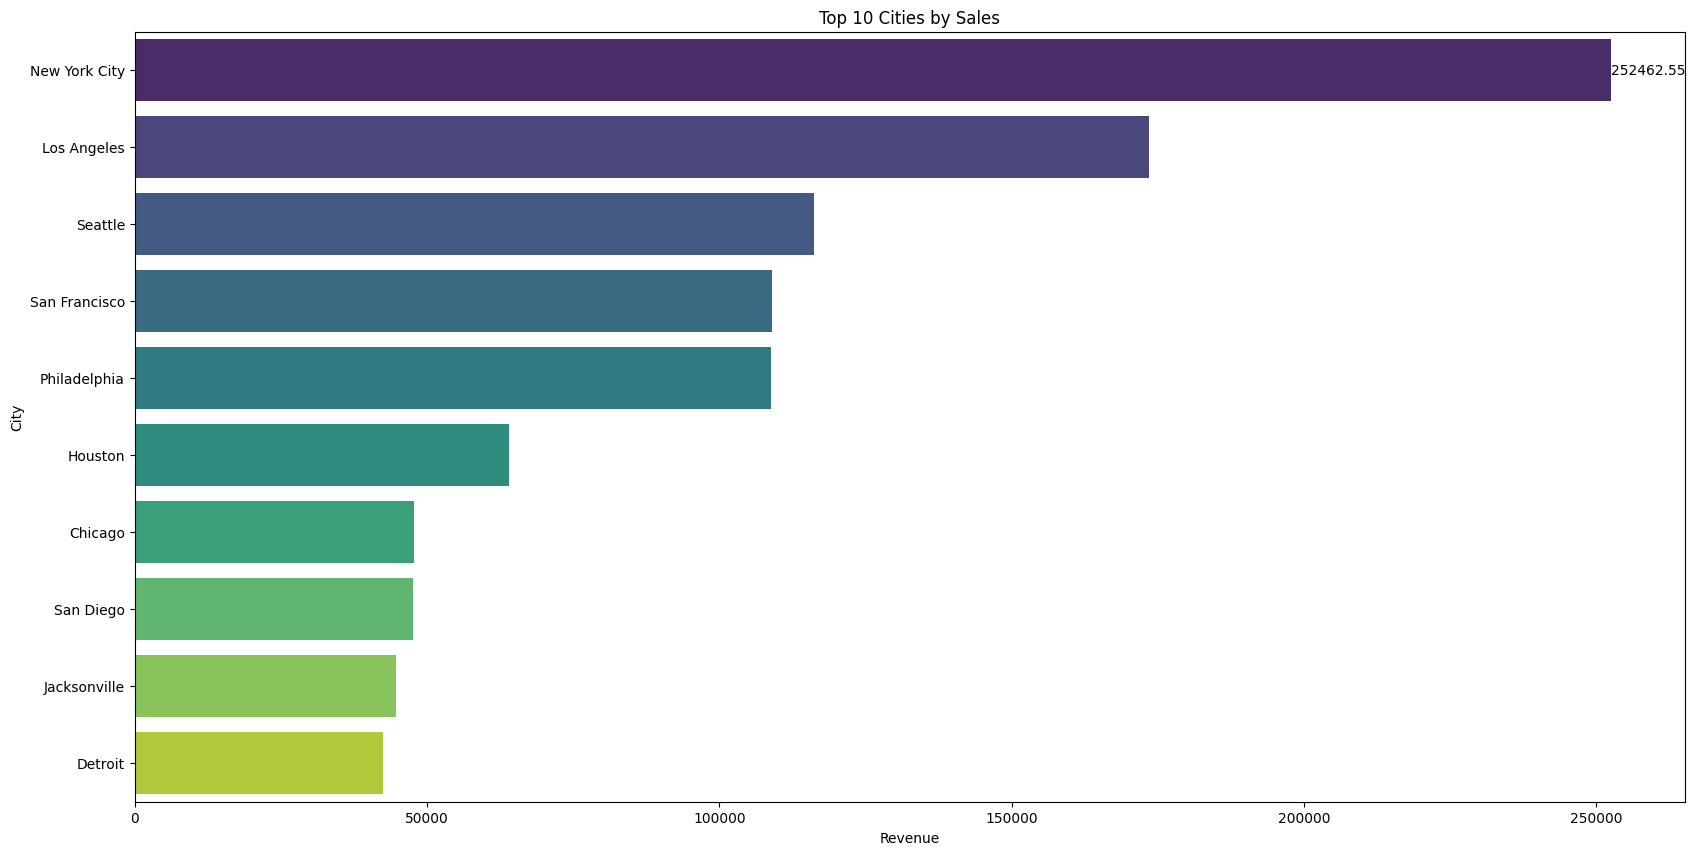

In [15]:
# Top 10 Cities by Sales
top_cities = df.groupby("City")["Sales"].sum().reset_index().sort_values(by="Sales", ascending=False).head(10)
plt.figure(figsize=(20, 10))
ax=sns.barplot(x="Sales", y="City", data=top_cities, palette="viridis")
ax.bar_label(ax.containers[0],fmt="%.2f",fontsize=10,color='black')
plt.title("Top 10 Cities by Sales")
plt.xlabel("Revenue")
plt.ylabel("City")
plt.show()

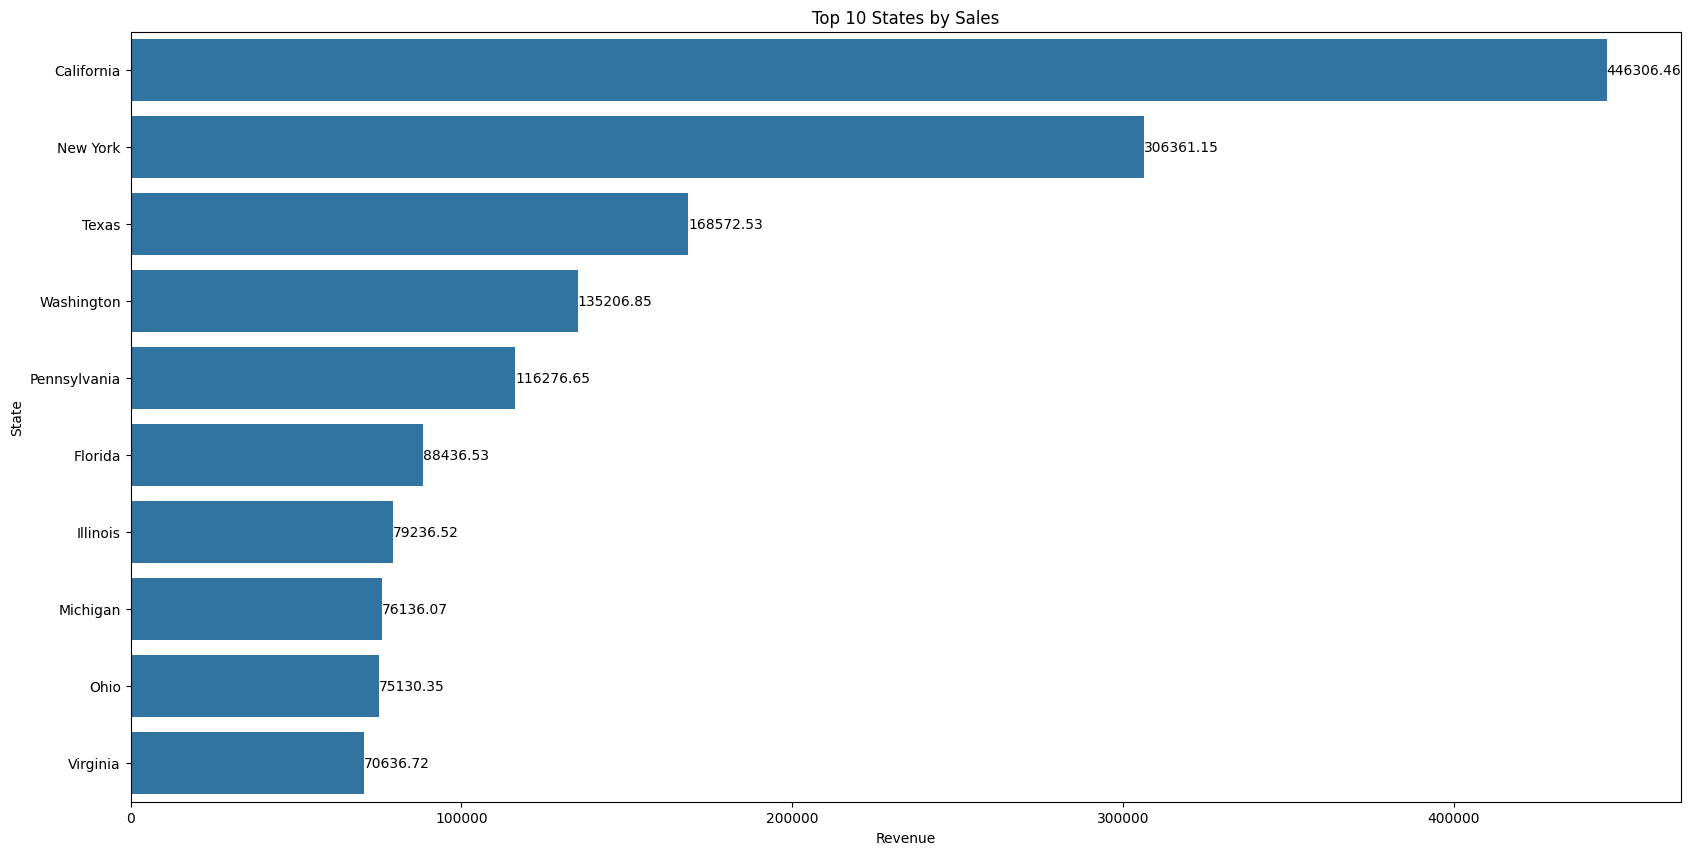

In [16]:
# Top 10 States by Sales
top_States = df.groupby("State")["Sales"].sum().reset_index().sort_values(by="Sales", ascending=False).head(10)
plt.figure(figsize=(20, 10))
ax = sns.barplot(x="Sales", y="State", data=top_States)
ax.bar_label(ax.containers[0],fmt="%.2f",fontsize=10,color='black')
plt.title("Top 10 States by Sales")
plt.xlabel("Revenue")
plt.ylabel("State")
plt.show()

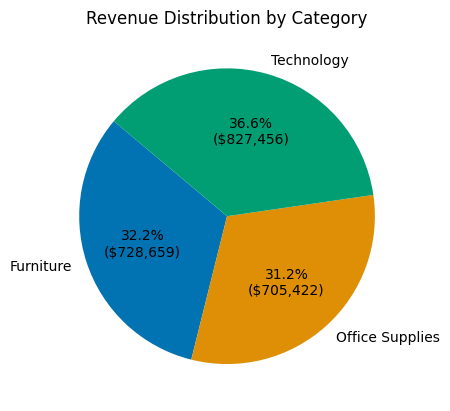

In [17]:
# Revenue by Category
category_revenue = df.groupby("Category")["Sales"].sum()
# we don't want to look at the percentage distribution in the pie chart. Instead, we want to look at the exact revenue generated by the categories.
def autopct_format(pct, all_values):
    total = sum(all_values)
    absolute = int(round(pct * total / 100))  # Convert percentage to absolute value
    return f"{pct:.1f}%\n(${absolute:,})"  # Format with thousands separator

plt.pie(category_revenue, labels=category_revenue.index, 
        autopct=lambda pct: autopct_format(pct, category_revenue), 
        startangle=140,colors=sns.color_palette('colorblind'))

plt.title("Revenue Distribution by Category")
plt.show()

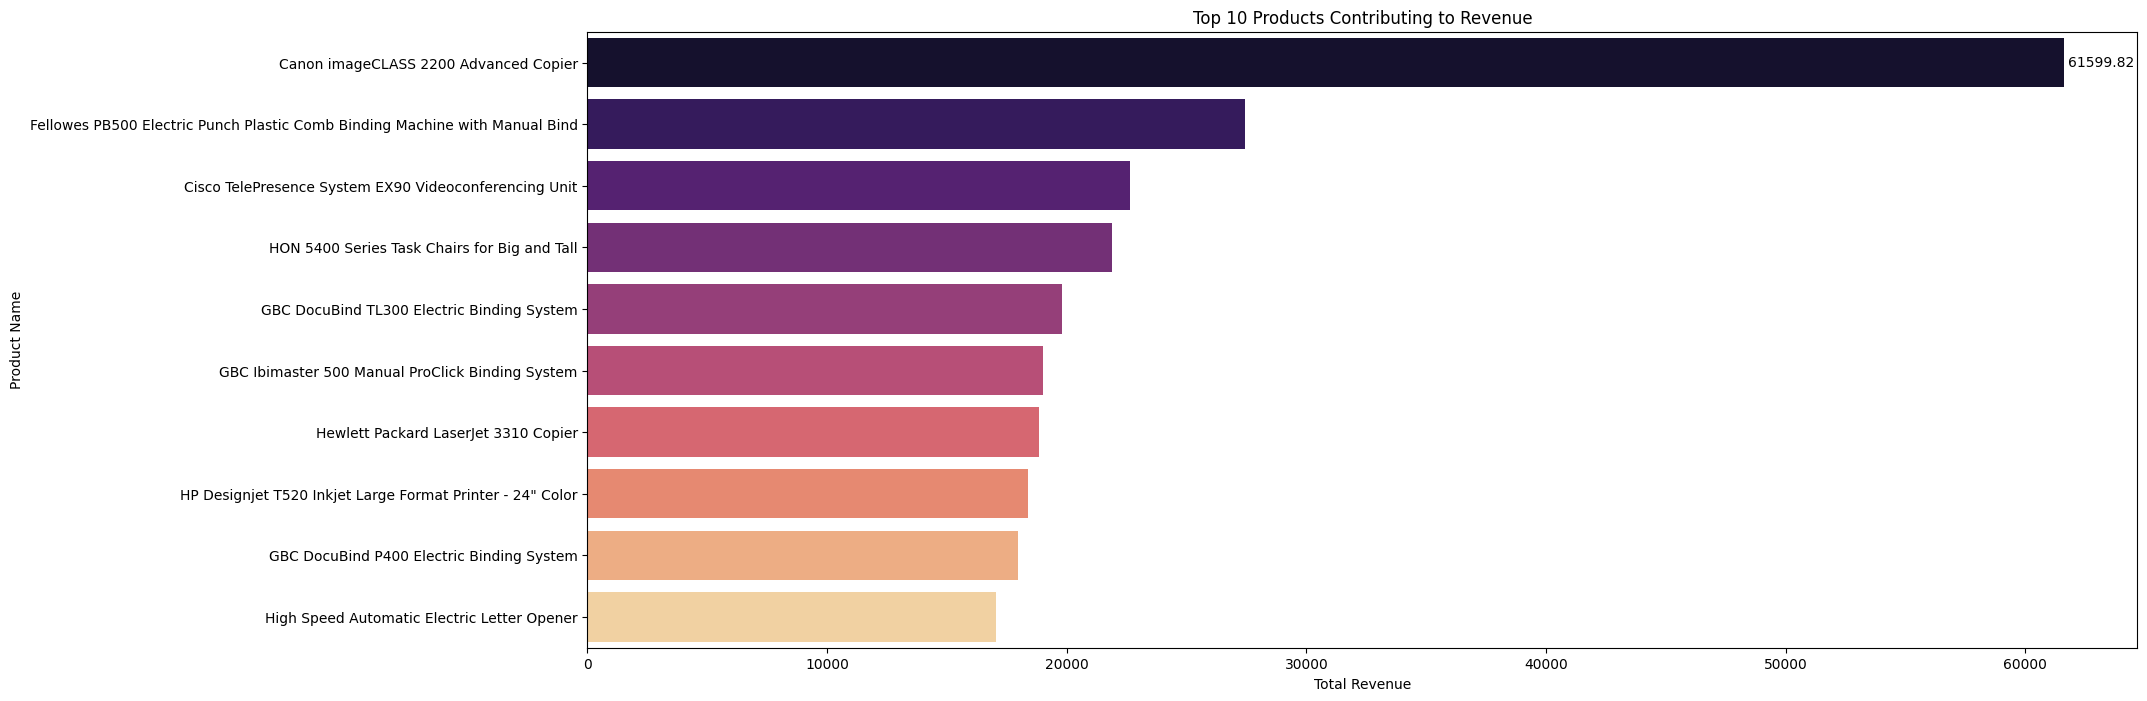

In [18]:
top_products = df.groupby("Product Name")["Sales"].sum().reset_index().sort_values(by="Sales", ascending=False).head(10)

# Plot Top 10 Products by Revenue
plt.figure(figsize=(20, 8))
ax = sns.barplot(x="Sales", y="Product Name", data=top_products, palette="magma")

# Add values on bars
ax.bar_label(ax.containers[0], fmt="%.2f", padding=3, fontsize=10)

plt.title("Top 10 Products Contributing to Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product Name")
plt.show()

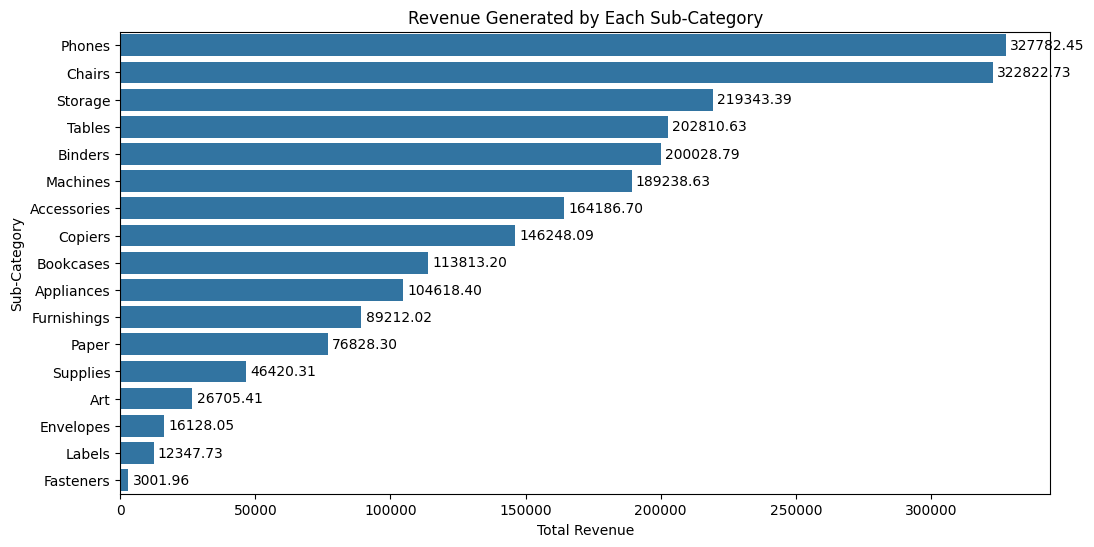

In [19]:
# Revenue by Sub-Category
subcat_revenue = df.groupby("Sub-Category")["Sales"].sum().reset_index().sort_values(by="Sales", ascending=False)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Sales", y="Sub-Category", data=subcat_revenue)
# Add values on bars
ax.bar_label(ax.containers[0], fmt="%.2f", padding=3, fontsize=10)
plt.title("Revenue Generated by Each Sub-Category")
plt.xlabel("Total Revenue")
plt.ylabel("Sub-Category")
plt.show()

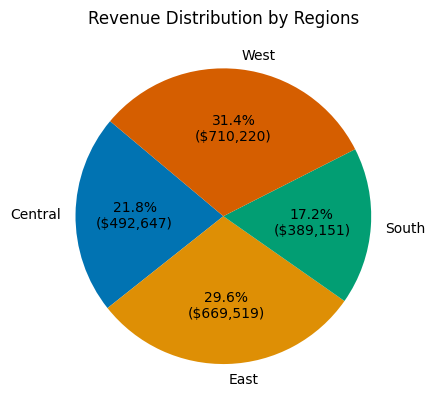

In [20]:
# Revenue by Region
regions_revenue = df.groupby("Region")["Sales"].sum()
# we don't want to look at the percentage distribution in the pie chart. Instead, we want to look at the exact revenue generated by the categories.
def autopct_format(pct, all_values):
    total = sum(all_values)
    absolute = int(round(pct * total / 100))  # Convert percentage to absolute value
    return f"{pct:.1f}%\n(${absolute:,})"  # Format with thousands separator

plt.pie(regions_revenue, labels=regions_revenue.index, 
        autopct=lambda pct: autopct_format(pct,regions_revenue), 
        startangle=140,colors=sns.color_palette('colorblind'))

plt.title("Revenue Distribution by Regions")
plt.show()

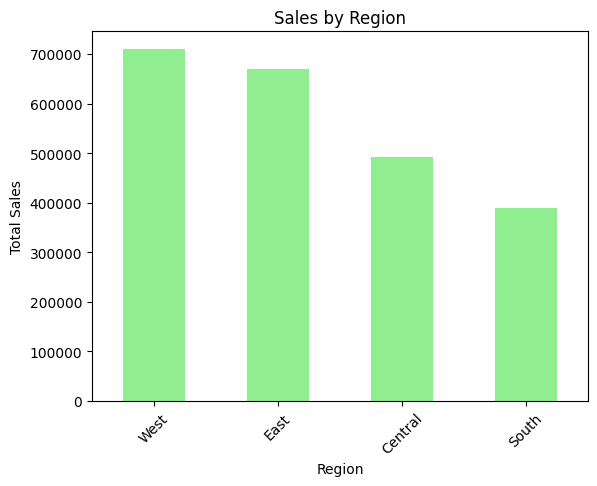

In [21]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

region_sales.plot(kind='bar', color='lightgreen')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


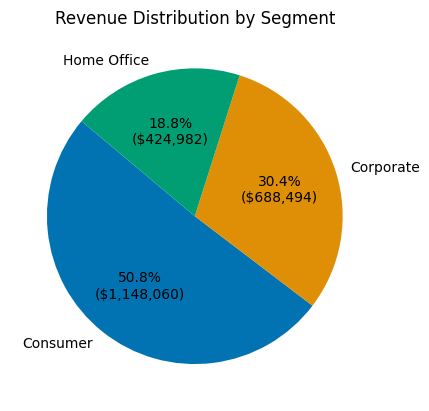

In [22]:
# Revenue by Segment 
Segment_revenue = df.groupby("Segment")["Sales"].sum()

def autopct_format(pct, all_values):
    total = sum(all_values)
    absolute = int(round(pct * total / 100))  # Convert percentage to absolute value
    return f"{pct:.1f}%\n(${absolute:,})"  # Format with thousands separator

plt.pie(Segment_revenue, labels=Segment_revenue.index, 
        autopct=lambda pct: autopct_format(pct, category_revenue), 
        startangle=140,colors=sns.color_palette('colorblind'))

plt.title("Revenue Distribution by Segment")
plt.show()

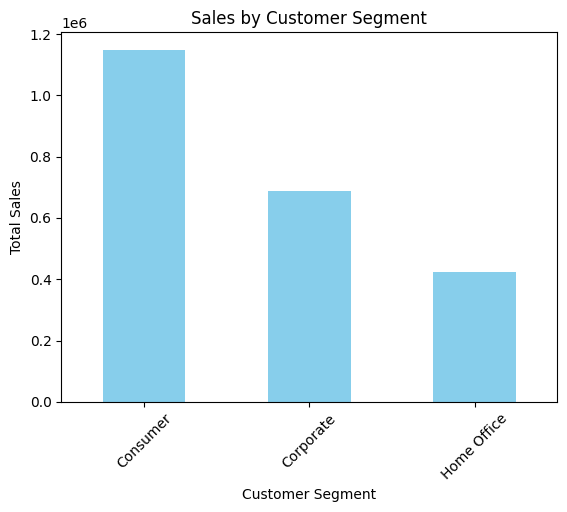

In [23]:
segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)

segment_sales.plot(kind='bar', color='skyblue')
plt.title('Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

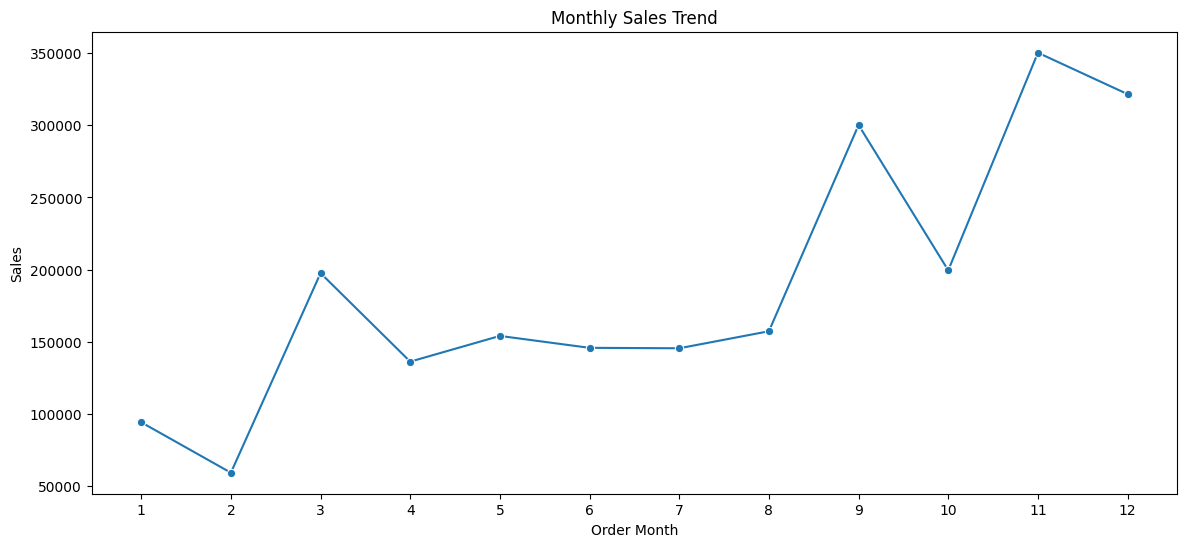

In [24]:
# Study sales trends over months
timemonthly_sales = df.groupby('Order Month')['Sales'].sum().reset_index()

# Ensure 'Order Month' is treated as a string
timemonthly_sales['Order Month'] = timemonthly_sales['Order Month'].astype(str)

# Plotting the sales trend over months
plt.figure(figsize=(14, 6))
sns.lineplot(data=timemonthly_sales, x='Order Month', y='Sales', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Order Month')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.show()


count    9800.000000
mean        3.961122
std         1.749614
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Shipping Time (days), dtype: float64


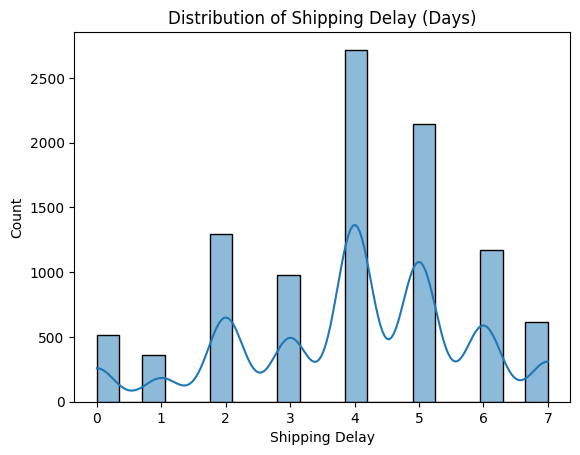

In [25]:
# Distribution of Shipping Delay
print(df['Shipping Time (days)'].describe())

sns.histplot(df['Shipping Time (days)'], bins=20, kde=True)
plt.title('Distribution of Shipping Delay (Days)')
plt.xlabel('Shipping Delay')
plt.ylabel('Count')
plt.show()


## *make data prepared for modeling*

In [26]:
# Check column names
print(df.columns)

Index(['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Shipping Time (days)', 'Order Month', 'Order Day Of Week',
       'Order Year'],
      dtype='object')


In [27]:
# Drop unneeded columns
cols_to_drop = ['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Product ID', 'Product Name', 'Ship Date']
df_model = df.drop(columns=cols_to_drop)

In [28]:
# Create log-transformed target column before encoding
df_model['Sales_log'] = np.log1p(df_model['Sales'])

In [29]:
# One-hot encoding
categorical_cols = ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']
df_encoded = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)


In [30]:
sparse_cols = df_encoded.select_dtypes(include='bool').mean().sort_values()
print(sparse_cols.head(20))

City_Antioch            0.000102
State_Wyoming           0.000102
City_Baytown            0.000102
City_Billings           0.000102
City_Saint Peters       0.000102
City_San Luis Obispo    0.000102
City_San Mateo          0.000102
City_Rochester Hills    0.000102
City_Rock Hill          0.000102
City_Rogers             0.000102
City_Romeoville         0.000102
City_Portage            0.000102
City_Redding            0.000102
City_Redwood City       0.000102
City_Port Orange        0.000102
City_Pensacola          0.000102
City_Pico Rivera        0.000102
City_Springdale         0.000102
City_Yucaipa            0.000102
City_Orland Park        0.000102
dtype: float64


In [31]:
# Drop sparse boolean columns (e.g., City columns with < 0.5% True)
bool_cols = df_encoded.select_dtypes(include='bool')
sparse_cols = bool_cols.columns[bool_cols.mean() < 0.005]
df_encoded.drop(columns=sparse_cols, inplace=True)

In [32]:
# Feature engineering
df_encoded['Is_Weekend'] = df_encoded['Order Day Of Week'].isin([5, 6]).astype(int)
df_encoded['Quarter'] = pd.cut(df_encoded['Order Month'], bins=[0, 3, 6, 9, 12], labels=[1, 2, 3, 4])
df_encoded['Holiday_Season'] = df_encoded['Order Month'].isin([11, 12]).astype(int)

In [33]:
# Final column order
model_columns = ['Shipping Time (days)', 'Order Month', 'Order Day Of Week', 'Order Year', 
                 'Ship Mode_Same Day', 'Ship Mode_Second Class', 'Ship Mode_Standard Class', 
                 'Segment_Corporate', 'Segment_Home Office', 'City_Arlington', 'City_Aurora', 
                 'City_Charlotte', 'City_Chicago', 'City_Columbia', 'City_Columbus', 'City_Dallas', 
                 'City_Detroit', 'City_Henderson', 'City_Houston', 'City_Jackson', 'City_Jacksonville', 
                 'City_Long Beach', 'City_Los Angeles', 'City_Louisville', 'City_Miami', 'City_New York City', 
                 'City_Newark', 'City_Philadelphia', 'City_Phoenix', 'City_Richmond', 'City_Rochester', 
                 'City_San Antonio', 'City_San Diego', 'City_San Francisco', 'City_Seattle', 'City_Springfield', 
                 'State_Arizona', 'State_Arkansas', 'State_California', 'State_Colorado', 'State_Connecticut', 
                 'State_Delaware', 'State_Florida', 'State_Georgia', 'State_Illinois', 'State_Indiana', 
                 'State_Kentucky', 'State_Maryland', 'State_Massachusetts', 'State_Michigan', 'State_Minnesota', 
                 'State_Mississippi', 'State_Missouri', 'State_New Jersey', 'State_New York', 'State_North Carolina', 
                 'State_Ohio', 'State_Oklahoma', 'State_Oregon', 'State_Pennsylvania', 'State_Rhode Island', 
                 'State_Tennessee', 'State_Texas', 'State_Utah', 'State_Virginia', 'State_Washington', 
                 'State_Wisconsin', 'Region_East', 'Region_South', 'Region_West', 'Category_Office Supplies', 
                 'Category_Technology', 'Sub-Category_Appliances', 'Sub-Category_Art', 'Sub-Category_Binders', 
                 'Sub-Category_Bookcases', 'Sub-Category_Chairs', 'Sub-Category_Copiers', 'Sub-Category_Envelopes', 
                 'Sub-Category_Fasteners', 'Sub-Category_Furnishings', 'Sub-Category_Labels', 'Sub-Category_Machines', 
                 'Sub-Category_Paper', 'Sub-Category_Phones', 'Sub-Category_Storage', 'Sub-Category_Supplies', 
                 'Sub-Category_Tables', 'Is_Weekend', 'Quarter', 'Holiday_Season']

# Filter to selected model columns and keep Sales_log
df_encoded = df_encoded[model_columns + ['Sales_log']]

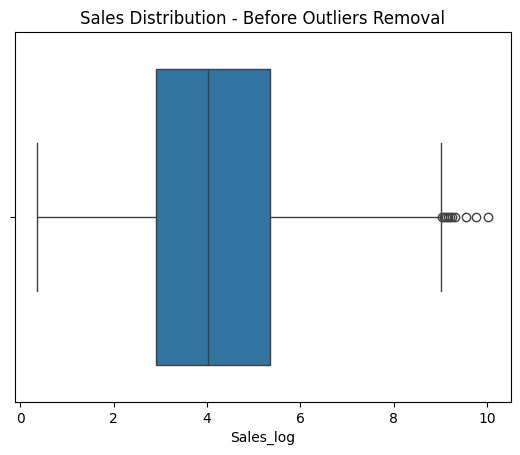

In [34]:
# Visualize and remove outliers
sns.boxplot(x=df_encoded['Sales_log'])
plt.title("Sales Distribution - Before Outliers Removal")
plt.show()

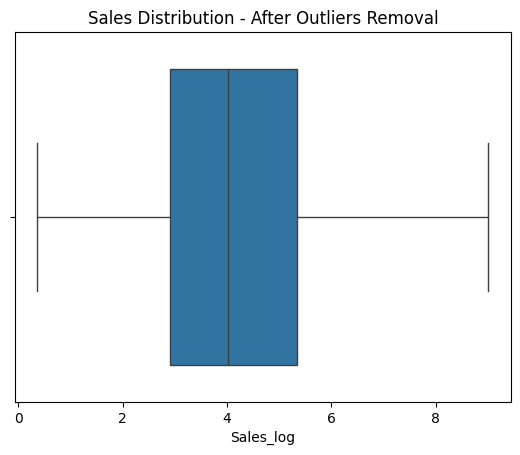

In [35]:
# IQR method to remove outliers
Q1 = df_encoded['Sales_log'].quantile(0.25)
Q3 = df_encoded['Sales_log'].quantile(0.75)
IQR = Q3 - Q1
df_model = df_encoded[(df_encoded['Sales_log'] >= Q1 - 1.5 * IQR) & (df_encoded['Sales_log'] <= Q3 + 1.5 * IQR)]

# Plot after outlier removal
sns.boxplot(x=df_model['Sales_log'])
plt.title("Sales Distribution - After Outliers Removal")
plt.show()

In [36]:
# Print dataset size
print(f"Before: {len(df)} rows")
print(f"After: {len(df_model)} rows")

Before: 9800 rows
After: 9790 rows


In [39]:
# -------- Feature Engineering (لو مش موجودة) --------
if 'Quarter' not in df_model.columns:
    df['Quarter'] = (df_model['Order Month'] - 1) // 3 + 1

if 'Is_Weekend' not in df_model.columns:
    df['Is_Weekend'] = df_model['Order Day Of Week'].apply(lambda x: 1 if x in [5, 6] else 0)

if 'Holiday_Season' not in df_model.columns:
    df['Holiday_Season'] = df_model['Order Month'].apply(lambda x: 1 if x in [11, 12] else 0)


In [41]:
df_model.head()

,Shipping Time (days),Order Month,Order Day Of Week,Order Year,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Corporate,Segment_Home Office,City_Arlington,...,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Is_Weekend,Quarter,Holiday_Season,Sales_log
Order Date,,,,,,,,,,,,,,,,,,,,,
2015-01-03,4,1,5,2015,False,False,True,False,False,False,...,False,True,False,False,False,False,1,1,0,2.859225
2015-01-04,4,1,6,2015,False,False,True,False,True,False,...,False,False,False,False,False,False,1,1,0,1.512927
2015-01-04,4,1,6,2015,False,False,True,False,True,False,...,False,False,False,True,False,False,1,1,0,5.612164
2015-01-04,4,1,6,2015,False,False,True,False,True,False,...,False,False,False,False,False,False,1,1,0,2.548194
2015-01-05,7,1,0,2015,False,False,True,False,False,False,...,False,False,False,False,False,False,0,1,0,3.022179


In [42]:
import joblib

# استخرج الأعمدة بدون الهدف (target)
feature_names = df_model.drop(columns=['Sales_log']).columns.tolist()

# خزّن أسماء الأعمدة في ملف
joblib.dump(feature_names, 'model_features.pkl')

print("✅ Saved model_features.pkl")


✅ Saved model_features.pkl


In [43]:
# Export cleaned dataset
df_model.to_csv("sales_cleaned.csv", index=False)

#### ةةةةةةةةةةةةةةةةةةةةةةةةةةةةةةةةة